<a href="https://colab.research.google.com/gist/Hemlatapatil03/c368c38f293fedee94e979c130053c35/handwrittendigitprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand Written Digit Prediction - Classification Analysis

Objective

Hand-Written-Digit-Prediction-
Handwritten Digit Prediction - Classification Analysis is to develop a highly accurate machine learning model that can classify handwritten digits (0-9) with precision and recall. The model should generalize well to new data, avoid overfitting, and be deployable in real-world applications, such as optical character recognition systems

Import Library

In [33]:
import pandas as pd

In [34]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

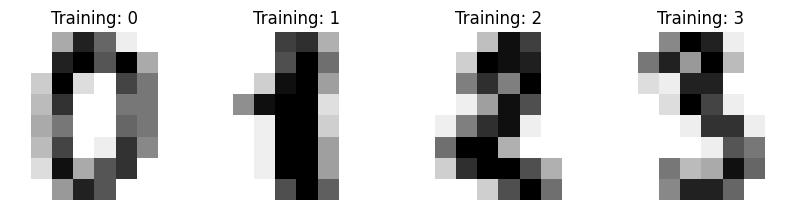

In [ ]:
_, axes = plt.subplots(nrows = 1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" %label)

Data Preprocessing

In [ ]:
df.images.shape


(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data= df.images.reshape(n_samples, -1)

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Define Target Variable (y) and Feature Variable (x)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3 )

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

Predict Test Data

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([7, 0, 6, 0, 4, 1, 6, 6, 1, 4, 8, 3, 4, 6, 6, 6, 4, 0, 8, 9, 5, 7,
       7, 2, 2, 2, 4, 6, 6, 0, 2, 1, 6, 8, 9, 6, 2, 5, 5, 6, 8, 3, 7, 3,
       8, 5, 2, 2, 9, 4, 6, 5, 5, 7, 4, 0, 1, 5, 7, 1, 7, 8, 8, 5, 8, 5,
       4, 0, 0, 6, 8, 5, 6, 1, 2, 3, 6, 0, 7, 0, 0, 7, 2, 0, 9, 7, 9, 3,
       6, 0, 9, 2, 6, 7, 4, 7, 9, 0, 8, 5, 2, 0, 8, 1, 9, 8, 0, 0, 3, 5,
       4, 3, 2, 9, 4, 7, 0, 2, 3, 3, 0, 5, 8, 5, 5, 5, 7, 0, 1, 3, 3, 0,
       8, 7, 2, 8, 0, 5, 5, 1, 4, 4, 4, 7, 5, 8, 8, 4, 0, 0, 6, 4, 1, 6,
       4, 8, 7, 6, 0, 8, 2, 0, 6, 0, 4, 9, 6, 9, 4, 7, 1, 5, 3, 1, 5, 0,
       3, 3, 6, 8, 9, 3, 9, 8, 4, 4, 6, 3, 3, 3, 7, 9, 8, 4, 5, 4, 3, 1,
       7, 7, 8, 7, 6, 0, 7, 2, 2, 2, 8, 7, 1, 4, 9, 8, 9, 1, 6, 4, 1, 8,
       4, 0, 3, 9, 1, 2, 6, 3, 3, 1, 1, 7, 3, 0, 5, 4, 2, 1, 0, 5, 8, 6,
       9, 3, 3, 4, 0, 5, 7, 5, 8, 0, 1, 3, 7, 8, 3, 3, 8, 1, 1, 8, 3, 6,
       1, 8, 4, 9, 2, 1, 8, 5, 1, 8, 0, 6, 5, 9, 9, 9, 8, 8, 1, 2, 9, 8,
       1, 9, 4, 1, 7, 2, 8, 3, 8, 2, 9, 5, 9, 9, 4,

Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  0,  0,  1,  2],
       [ 1,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0,  1, 53,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  0,  2, 50]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.93      1.00      0.96        51
           2       1.00      1.00      1.00        46
           3       0.98      0.98      0.98        49
           4       0.95      1.00      0.98        63
           5       1.00      0.95      0.97        59
           6       1.00      0.98      0.99        52
           7       0.98      1.00      0.99        55
           8       0.93      0.91      0.92        58
           9       0.96      0.91      0.93        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Explanation

1. Firstly i import three libraries as follows:
panadas,numpy,matplotib.pyplot

2. Secondly imported the data from  datasource sklearn.datasets and load it.

3. After that performs Image Preprocessing.

4. Scale the imported image data.

5.From the imported library import classifiers.

6. Predict the test data.

7. Check the model Accuracy by import confusion matrix and classification report.


